# Q. KBO 최고의 타자는?

In [2]:
import pandas as pd

path = './데이터분석/인강/6. 러닝스푼즈_포트폴리오/파이썬 기초 강의자료/PJT1)Baseball_Analysis/data/KBO_2019_player_gamestats.csv'
raw = pd.read_csv(path, encoding = 'cp949')
raw

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15306,SK,정현,1994-06-01,09-19,두산,L 4:6,8,SS,1,1,...,0,0,0.083,0.190,0.083,0.274,10,0.91,-0.26,-0.023
15307,SK,정현,1994-06-01,09-20,키움,L 1:5,8,SS,0,0,...,0,0,0.083,0.190,0.083,0.274,0,0.00,0.00,0.000
15308,SK,정현,1994-06-01,09-28,@삼성,L 7:9,9,SS,0,0,...,0,0,0.083,0.190,0.083,0.274,0,0.00,0.00,0.000
15309,SK,정현,1994-06-01,09-30,@한화,W 6:2,7,2B,1,2,...,0,0,0.079,0.200,0.079,0.279,18,0.43,0.03,0.011


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

In [4]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')

In [6]:
# 타자 데이터분석에 활용할 칼럼만 선택

columns_select = ['팀', '이름', '생일', '일자', '상대', '타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비']
data = raw[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0


#### 선수별 기록 집계하기

In [7]:
# 피벗테이블을 이용해 선수별 주요 기록 정리

data_player = data.pivot_table(index = ['팀', '이름', '생일'], 
                               values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비'], 
                              aggfunc = 'sum')
data_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  최윤석 1987-03-28    3   3   0    3   12   1   0   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    하주석 1994-02-25    7   0   0    5   19   2   0   0
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[285 rows x 8 columns]

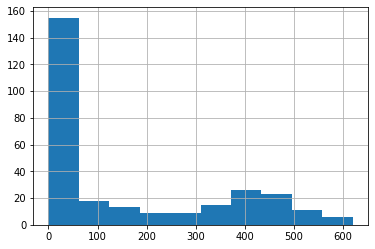

In [8]:
# 타수가 적으면 필요가 없으므로 타수 데이터의 분포 확인

data_player['타수'].hist()

* 0~50 사이에 많이 몰려 있으므로 이렇게 타수가 적은 데이터는 제외

In [9]:
# 타수가 50이상인 선수들만 선택
# reset_index()를 이용해 현재 인덱스로 설정된 데이터를 다시 칼럼으로 변경

cond = data_player['타수'] > 50
data_player = data_player[cond].reset_index()
data_player

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2
...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1


지표 | 의미 | 계산식
- | - | -
타율 | 타격에 성공해 살아나가는 정도 | = 타격 성공 횟수 / 타격 기회수 = 안타수 / 타수
출루율 | 살아서 나가는 정도 | = 진루 성공 횟수 / 진루 기회수 = (안타 + 볼넷 + 사구) / (타수 + 볼넷 + 사구 + 희비)
장타율 | 타격에 성공해 멀리 살아나가는 정도 | = 진루한 베이스 수 / 타격 기회수 = 루타 수 / 타수
OPS | 살아서 멀리 나가는 정도 | = 출루율 + 장타율

In [10]:
# 타율, 출루율, 장타율, OPS를 계산하는 함수

def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    return df

In [11]:
# 데이터에 타율, 출루율, 장타율, OPS 칼럼 추가

player_stat = cal_hit(data_player)
player_stat

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.730287
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.713666
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.664995
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.632883
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.617833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6,0.262411,0.317152,0.374113,0.691266
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0,0.250000,0.284404,0.365385,0.649788
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.398210,0.361930,0.760141
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1,0.230769,0.294574,0.435897,0.730471


In [12]:
# 출루율, 장타율, OPS, 타율 기준으로 정렬하여 KBO 최고 타자는 누구인지 확인

player_stat = player_stat.sort_values(by = ['출루율', '장타율', 'OPS', '타율'], ascending = False)
player_stat = player_stat.reset_index(drop = True)     # drop = True는 기존 인덱스를 칼럼으로 바꾸지 않는 설정
player_stat.head(20)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.443396,0.645161,1.088558
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.436285,0.571066,1.007351
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.415842,0.495434,0.911275
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.897262
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,6,0.339071,0.405488,0.476764,0.882252
5,NC,박민우,1993-02-06,203,42,9,161,471,45,1,6,0.341826,0.401515,0.430998,0.832513
6,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.398210,0.361930,0.760141
7,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.397942,0.557895,0.955836
8,KT,송민섭,1991-08-02,18,6,3,16,53,4,0,1,0.301887,0.396825,0.339623,0.736448
9,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.396127,0.514831,0.910957


* 출루율 기준으로 1등은 NC 나성범

#### 시각화

In [17]:
# seaborn, matplotlib으로 시각화 진행하기 전 데이터에 한글 들어 있을 때 아래 코드 실행

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지 한글 표시 설정

if platform.system() == 'Windows':     # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
else:     # Mac인 경우 애플고딕
    rc('font', family = 'AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정

matplotlib.rcParams['axes.unicode_minus'] = False

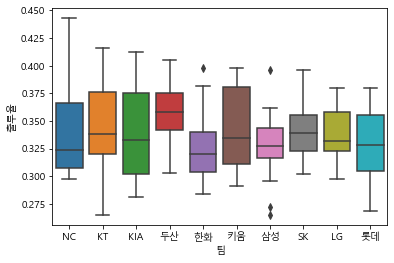

In [18]:
# 팀별 선수 출루율 분포 확인(by boxplot)

sns.boxplot(data = player_stat, x = '팀', y = '출루율')

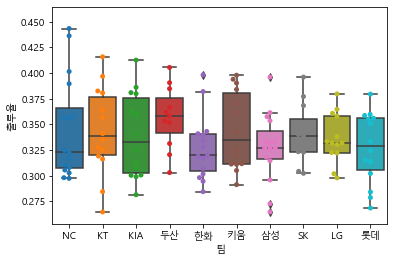

In [19]:
# 팀별 선수 출루율 분포(by swarmplot, boxplot)

sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x = '팀', y = '출루율')

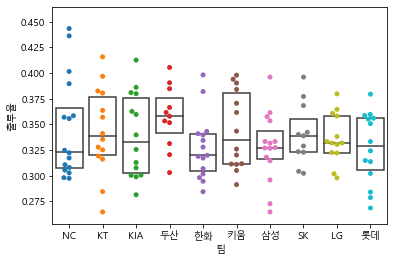

In [22]:
# swarmplot과 boxplot를 함께 사용할 경우 색이 겹쳐 구분하기 힘듦
# boxplot의 색상을 제거하고 표시하면 됨

sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x = '팀', y = '출루율',
           showcaps = False,     # 박스 상단 가로라인 보이지 않기
           whiskerprops = {'linewidth': 0},     # 박스 상단 세로 라인 보이지 않기
           showfliers = False,     # 박스 범위 벗어난 아웃라이어 제거
           boxprops = {'facecolor': 'None'})     # 박스 색상 지우기

In [23]:
# 타자별 기록 데이터 저장
# 엑셀에서도 조회할수 있도록 encoding = 'cp949'로 저장

player_stat.to_csv('./player_stat.csv', encoding = 'cp949', index = False)

# Q. 경기 성적이 꾸준한 선수? VS 여름에 성적이 떨어지는 선수?

In [24]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


#### 월별 기록 정리

In [31]:
# 일자 칼럼에서 월에 해당하는 값만 추출하여 월 칼럼 추가

month_list = []

for monthdate in raw['일자']:
    month = monthdate.split('-')[0]
    month_list.append(month)
    
raw['월'] = month_list
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,월
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,03
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,03
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,03
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,03
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,03


In [32]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA', '월'],
      dtype='object')

In [ ]:
# 분석에 활용할 칼럼 선택

columns_select = []
